#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [126]:
!pip install wget

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [128]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

In [129]:
items_ord = items.merge(orders, on='order_id', how='left')
items_ord = items_ord[items_ord.order_status == 'delivered']
prod_orders = items_ord.groupby("product_id", as_index=False) \
    .agg({"order_id": "count"})
prod_info_orders = products.merge(prod_orders, on='product_id', how='left')

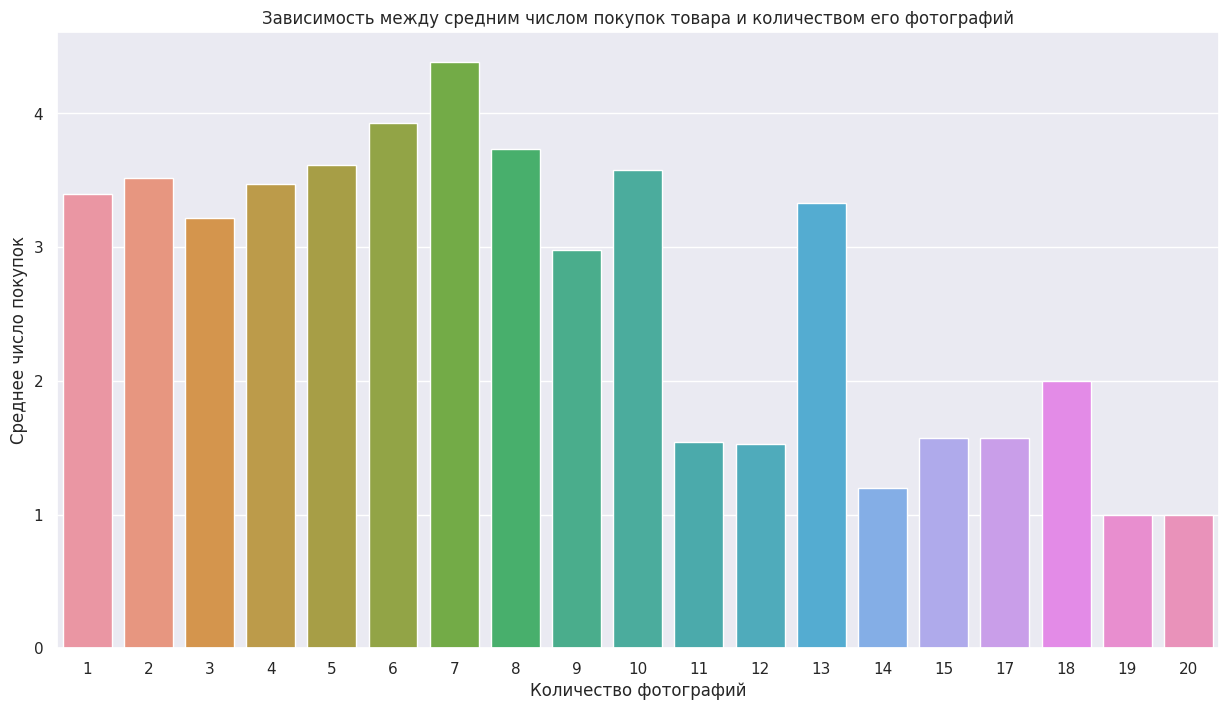

In [130]:
# 1 photos
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))



photos = prod_info_orders.groupby("product_photos_qty", as_index=False) \
    .agg({"order_id": "mean"})
photos.rename(columns={'order_id': 'avg_purchases'}, inplace=True)
photos['product_photos_qty'] = photos['product_photos_qty'].astype(int)

sns.barplot(data=photos, x="product_photos_qty", y="avg_purchases")
plt.title('Зависимость между средним числом покупок товара и количеством его фотографий')
plt.xlabel('Количество фотографий')
plt.ylabel('Среднее число покупок')
plt.show()

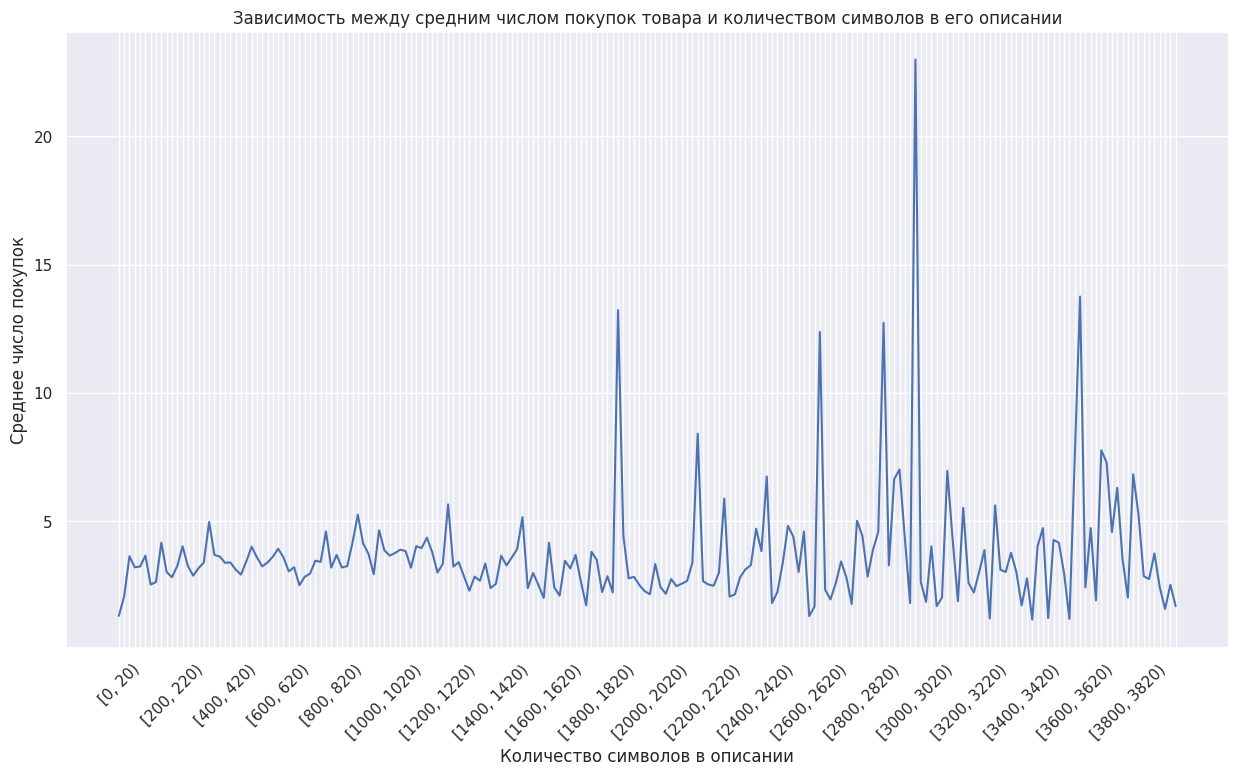

In [131]:
# 2 description
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))


tmp_prod_info = prod_info_orders
tmp_prod_info.dropna(subset=['product_description_lenght'],inplace=True)
tmp_prod_info['product_description_lenght'] = tmp_prod_info['product_description_lenght'].astype(int)

bins = list(range(0, tmp_prod_info['product_description_lenght'].max() + 25, 20))
tmp_prod_info['gr_description_lenght'] = pd.cut(tmp_prod_info['product_description_lenght'], bins=bins, right=False)
grouped_data = tmp_prod_info.groupby('gr_description_lenght', as_index=False)\
    .agg({"order_id": "mean"})
grouped_data.rename(columns={'order_id': 'avg_purchases'}, inplace=True)
grouped_data['gr_description_lenght'] = [str(cat) for cat in grouped_data['gr_description_lenght']]

sns.lineplot(data=grouped_data, x='gr_description_lenght', y='avg_purchases')
plt.title('Зависимость между средним числом покупок товара и количеством символов в его описании')
plt.xlabel('Количество символов в описании')
plt.ylabel('Среднее число покупок')

step = 10
for index, label in enumerate(plt.gca().get_xticklabels()):
    if index % step != 0:
        label.set_visible(False)
plt.xticks(rotation=45)

plt.show()

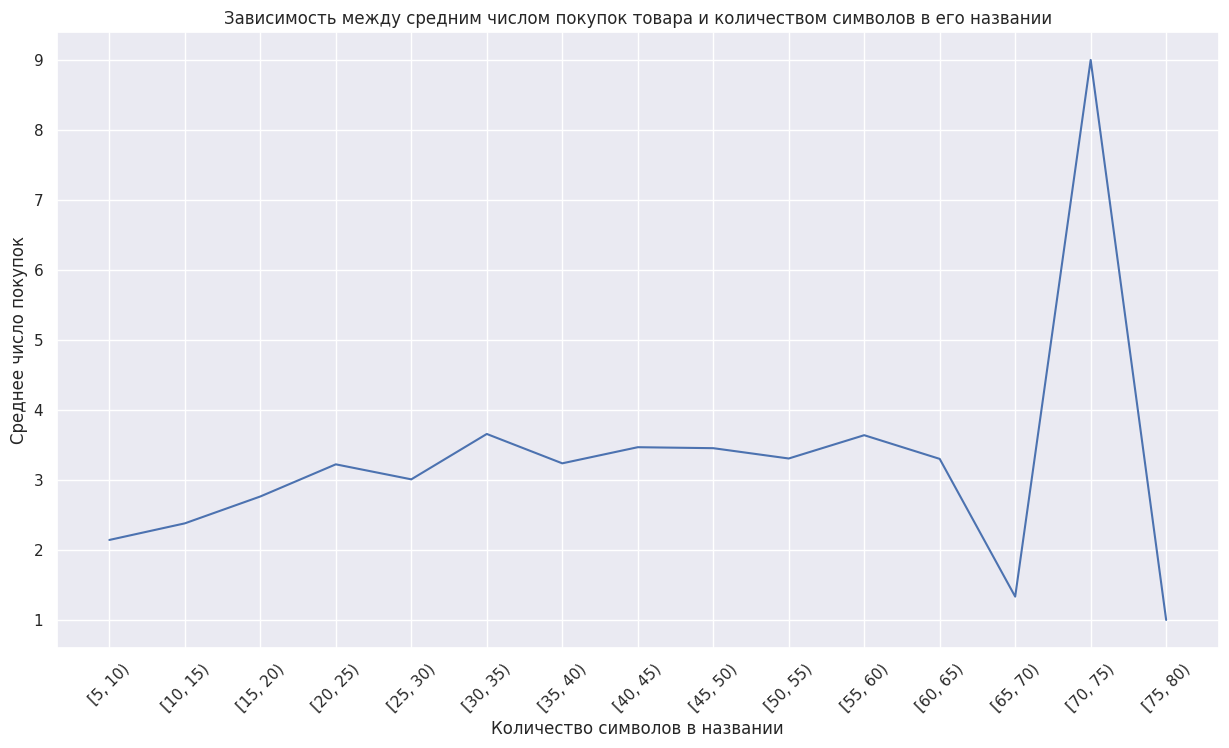

In [132]:
# 3 name
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))

tmp_prod_info = prod_info_orders
tmp_prod_info.dropna(subset=['product_name_lenght'],inplace=True)
tmp_prod_info['product_name_lenght'] = tmp_prod_info['product_name_lenght'].astype(int)

bins = list(range(0, tmp_prod_info['product_name_lenght'].max() + 8, 5))
tmp_prod_info['gr_name_lenght'] = pd.cut(tmp_prod_info['product_name_lenght'], bins=bins, right=False)
grouped_data = tmp_prod_info.groupby('gr_name_lenght', as_index=False)\
    .agg({"order_id": "mean"})
grouped_data.rename(columns={'order_id': 'avg_purchases'}, inplace=True)
grouped_data['gr_name_lenght'] = [str(cat) for cat in grouped_data['gr_name_lenght']]

sns.lineplot(data=grouped_data, x='gr_name_lenght', y='avg_purchases')
plt.title('Зависимость между средним числом покупок товара и количеством символов в его названии')
plt.xlabel('Количество символов в названии')
plt.ylabel('Среднее число покупок')
plt.xticks(rotation=45)

plt.show()

## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

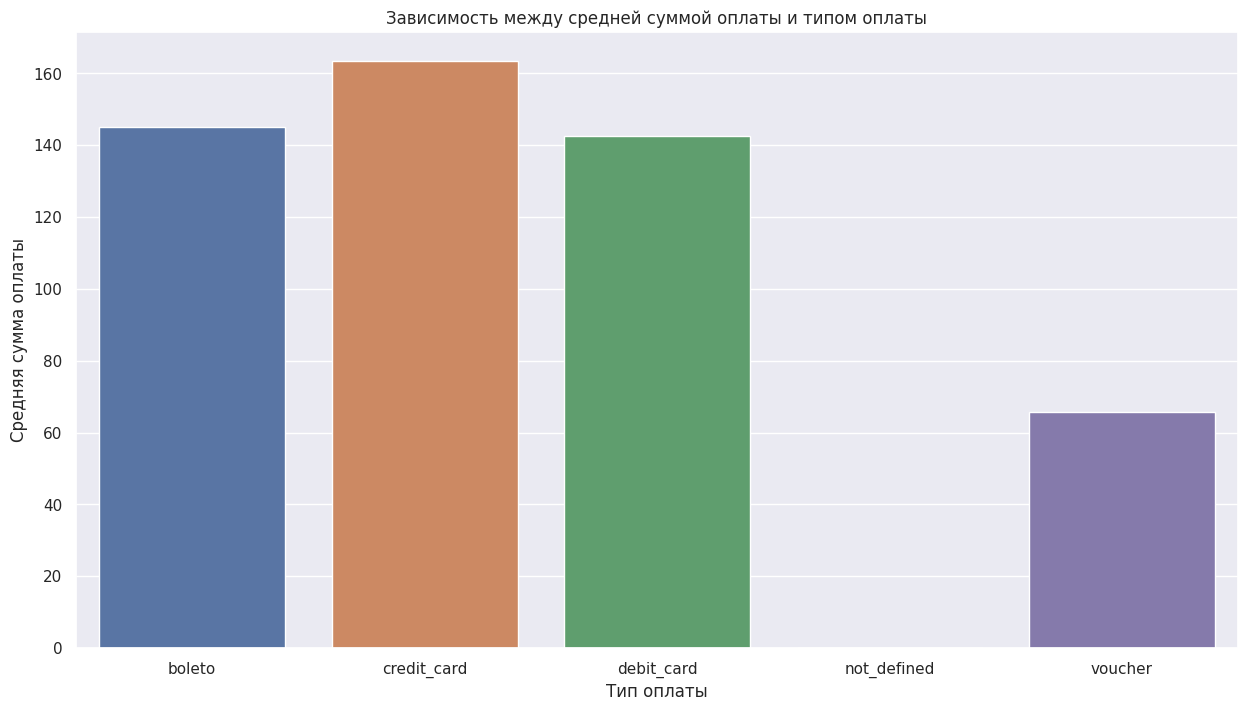

In [133]:
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))

payment_type = payments.groupby("payment_type", as_index=False) \
    .agg({"payment_value": "mean"})

sns.barplot(data=payment_type, x="payment_type", y="payment_value")
plt.title('Зависимость между средней суммой оплаты и типом оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Средняя сумма оплаты')
plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

In [134]:
gr_orders = items.groupby('order_id', as_index=False).agg({'price': 'sum', 'freight_value': 'sum'})
ord_paym = gr_orders.merge(payments, on='order_id', how='left')
ord_paym['price_freight'] =  ord_paym.price + ord_paym.freight_value
ord_paym['payment_not_equal_sum'] = ord_paym.price_freight != ord_paym.payment_value # за целую покупку
print(ord_paym.shape)
print(ord_paym.payment_not_equal_sum.sum()) # не везде совпадают значения payment_value и price + freight_value

(103057, 9)
26244


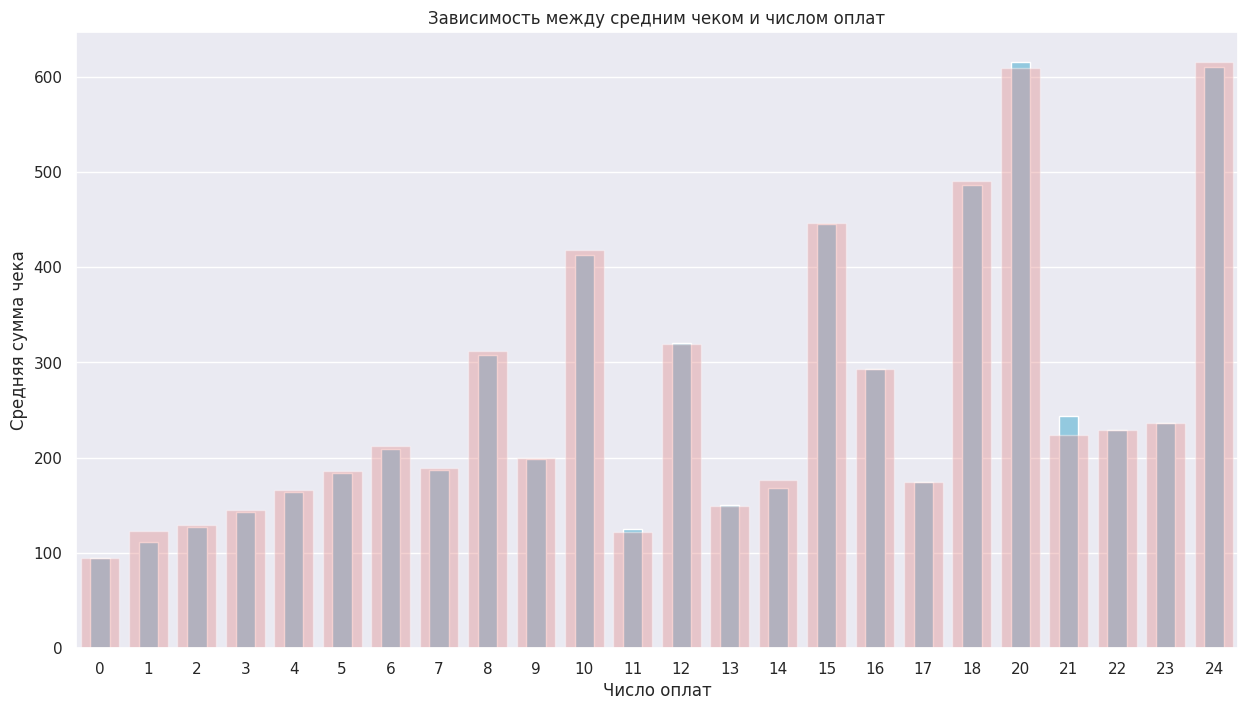

In [135]:
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))

tmp_ord_paym = ord_paym
tmp_ord_paym.dropna(subset=['payment_installments'],inplace=True)
tmp_ord_paym["payment_installments"] = tmp_ord_paym["payment_installments"].astype(int)
payment_installments = tmp_ord_paym.groupby("payment_installments", as_index=False) \
    .agg({"payment_value": "mean", "price_freight": "mean"})

sns.barplot(data=payment_installments, x="payment_installments", y="payment_value", color='skyblue', dodge=True, width=0.4, alpha=1)
sns.barplot(data=payment_installments, x="payment_installments", y="price_freight", color='lightcoral', dodge=True, width=0.8, alpha=0.4)

plt.title('Зависимость между средним чеком и числом оплат')
plt.xlabel('Число оплат')
plt.ylabel('Средняя сумма чека')
plt.show()

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

<Figure size 1500x800 with 0 Axes>

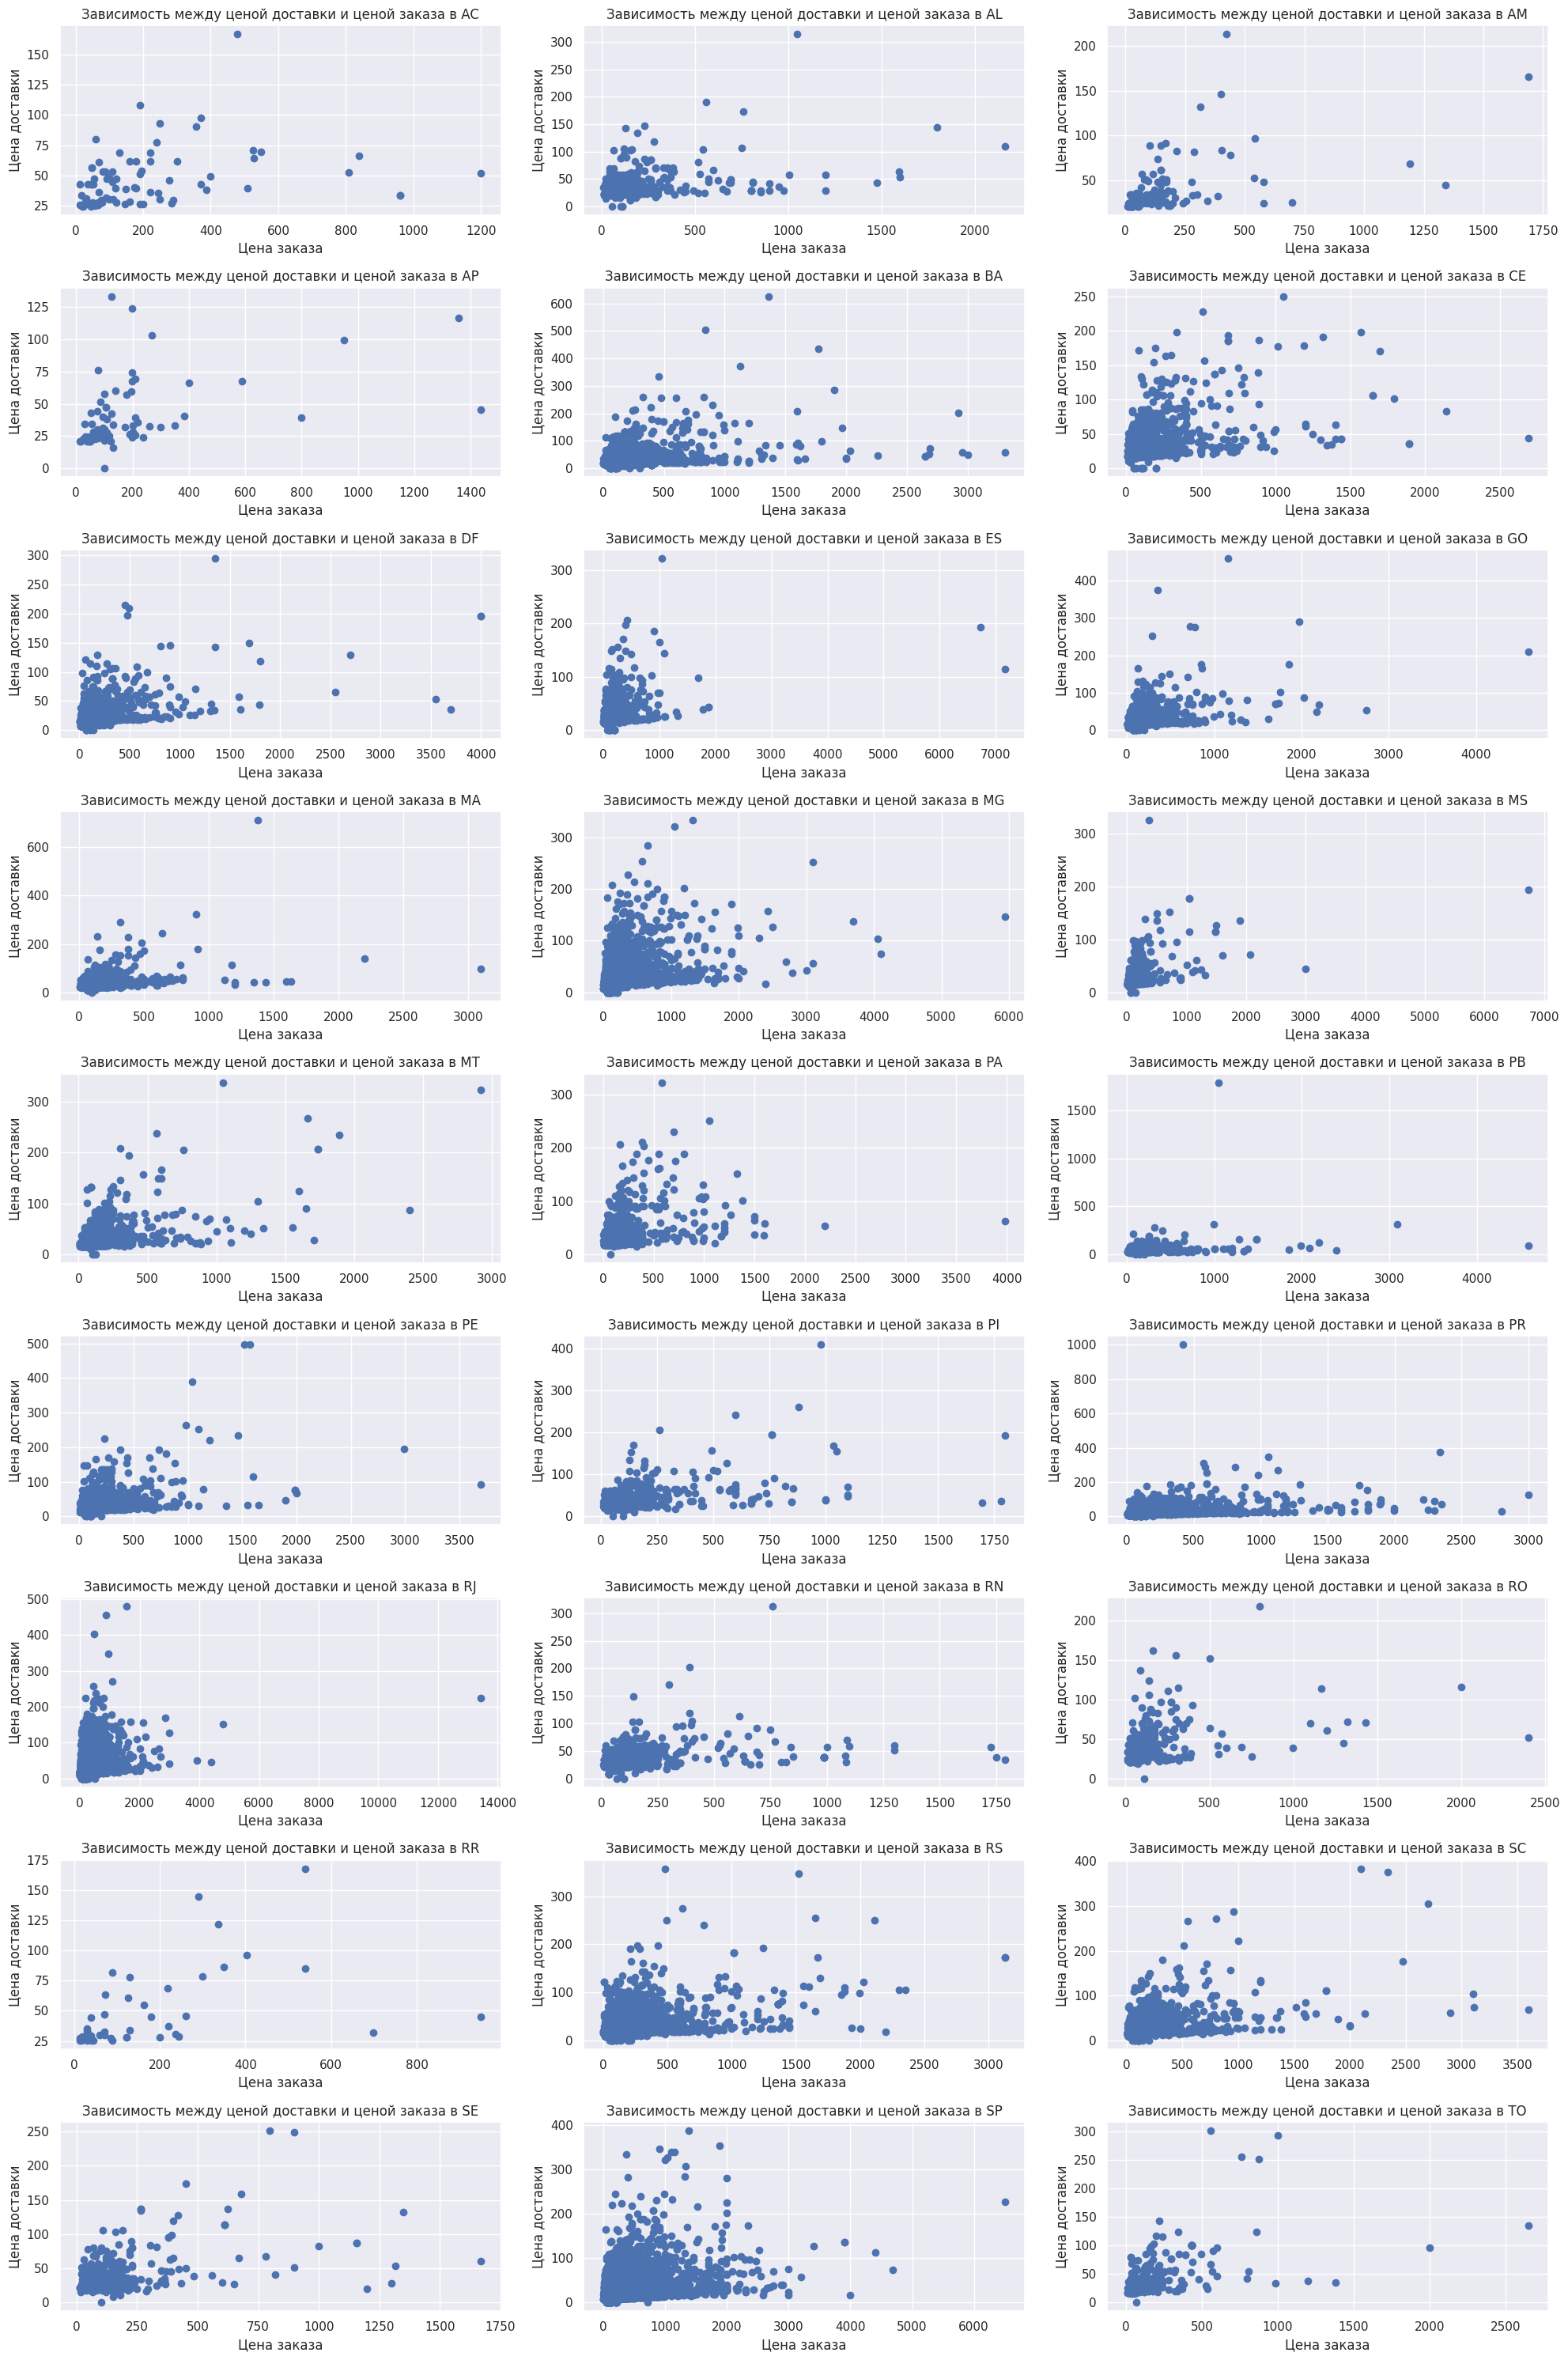

In [136]:
sns.set_palette("pastel")
sns.set_theme()
plt.figure(figsize=(15, 8))

items_gr = items.groupby('order_id', as_index=False).agg({'price': 'sum', 'freight_value': 'sum'})

orders_state = orders.merge(customers, on='customer_id', how='left')
orders_state = orders_state.merge(items_gr, on='order_id', how='left')
orders_state = orders_state.merge(payments, on='order_id', how='left')

grouped_state = orders_state.groupby('customer_state')
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))

for i, (state, group) in enumerate(grouped_state):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(group['price'], group['freight_value'])
    axes[row, col].set_title(f"Зависимость между ценой доставки и ценой заказа в {state}")
    axes[row, col].set_xlabel("Цена заказа")
    axes[row, col].set_ylabel("Цена доставки")


plt.tight_layout()
plt.show()

В основном, связь положительная, это связзано с тем, что чем дороже заказ, тем он либо габаритнее, либо ценнее. И то, и другое вылиывается в более дорогую доставку

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

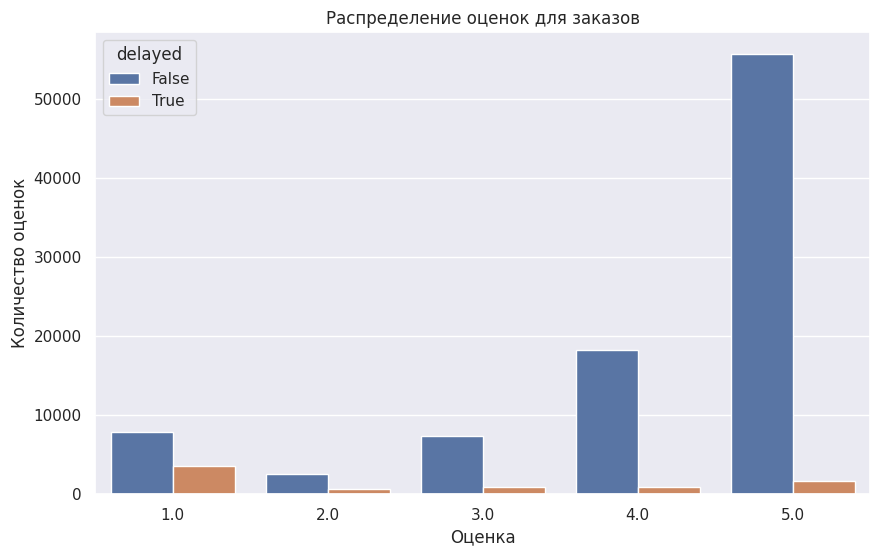

In [137]:
review = orders.merge(reviews, on='order_id', how='left')
review['delayed'] = review['order_delivered_customer_date'] > review['order_estimated_delivery_date']

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.set_theme()

count_dt = review.groupby(['review_score', 'delayed']).size().reset_index(name='count')

graph = sns.barplot(data=count_dt, x='review_score', y='count', hue='delayed')
graph.set(xlabel='Оценка', ylabel='Количество оценок')
plt.title('Распределение оценок для заказов')
plt.show()

Факт опоздания оказывает большое влияние на оценку

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

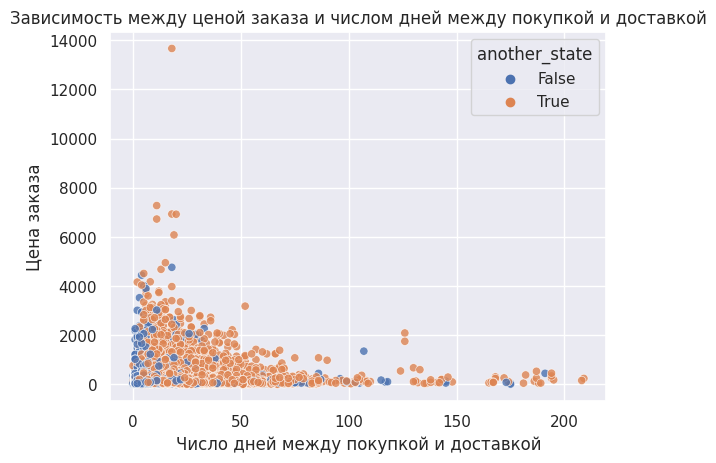

In [138]:
states = items.merge(sellers, on='seller_id', how='left')
items_gr = states.groupby('order_id')['seller_state'].apply(set).reset_index()
final = orders.merge(customers, on='customer_id', how='left').merge(items_gr, on='order_id', how='left')
final = final.merge(payments, on='order_id', how='left')

final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])
final['order_delivered_customer_date'] = pd.to_datetime(final['order_delivered_customer_date'])
final['delivery_long'] = (final['order_delivered_customer_date'] - final['order_purchase_timestamp']).dt.days

final['seller_state'] = final['seller_state'].fillna('Unknown')
final['another_state'] = final.apply(lambda x: x['customer_state'] not in x['seller_state'] or len(x['seller_state']) > 1, axis=1)

final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])
final['order_delivered_customer_date'] = pd.to_datetime(final['order_delivered_customer_date'])
final['delivery_long'] = (final['order_delivered_customer_date'] - final['order_purchase_timestamp']).dt.days

sns.scatterplot(data=final, x="delivery_long", y='payment_value', hue='another_state', alpha=0.8)
plt.title('Зависимость между ценой заказа и числом дней между покупкой и доставкой')
plt.xlabel('Число дней между покупкой и доставкой')
plt.ylabel('Цена заказа')
plt.show()

Можно проследить отрицательную зависимость